In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('./AirPassengers.csv').rename(columns={'Month': 'Date'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,#Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.tail()

,#Passengers
Date,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


## Time Series Plot

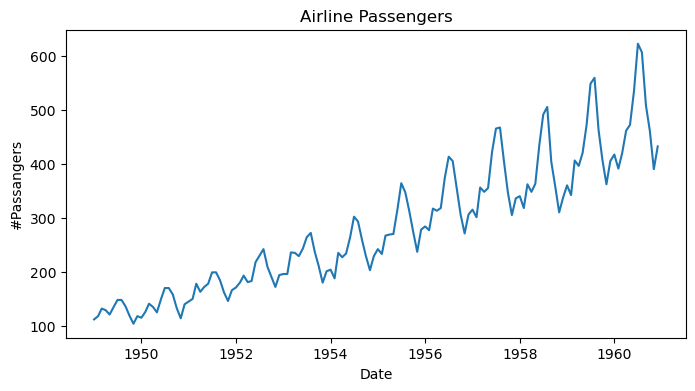

In [5]:
plt.figure(figsize=(8,4))
plt.plot(df)
plt.title('Airline Passengers')
plt.xlabel('Date')
plt.ylabel('#Passangers')
plt.show()

## Time Series division

In [6]:
train, val, test = df.loc['1949':'1957'], df.loc['1958':'1959'], df.loc['1960':]

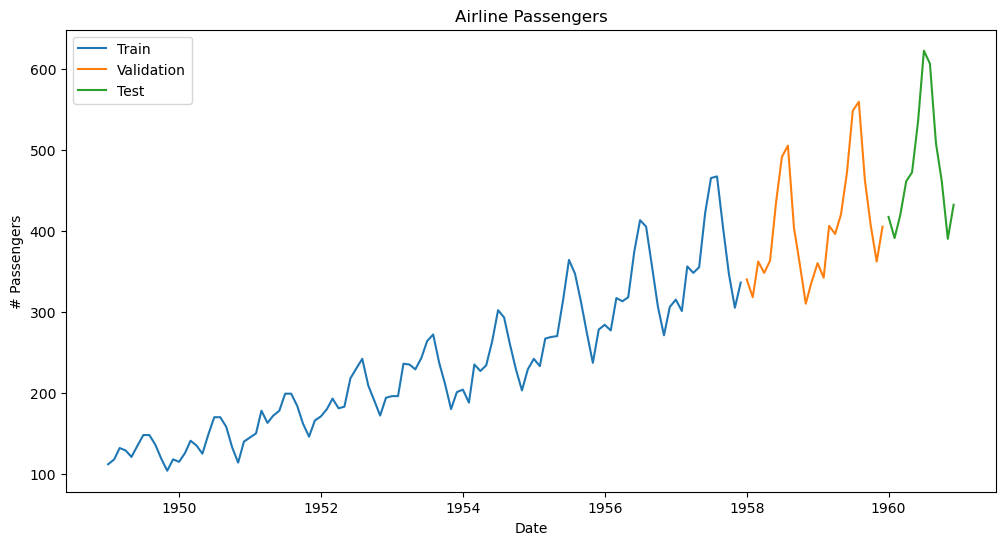

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Train')
plt.plot(val.index, val.values, label='Validation')
plt.plot(test.index, test.values, label='Test')
plt.title('Airline Passengers')
plt.xlabel('Date')
plt.ylabel('# Passengers')
plt.legend()
plt.show()

## Testing stationarity

In [8]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

In [9]:
import statsmodels.api as sm

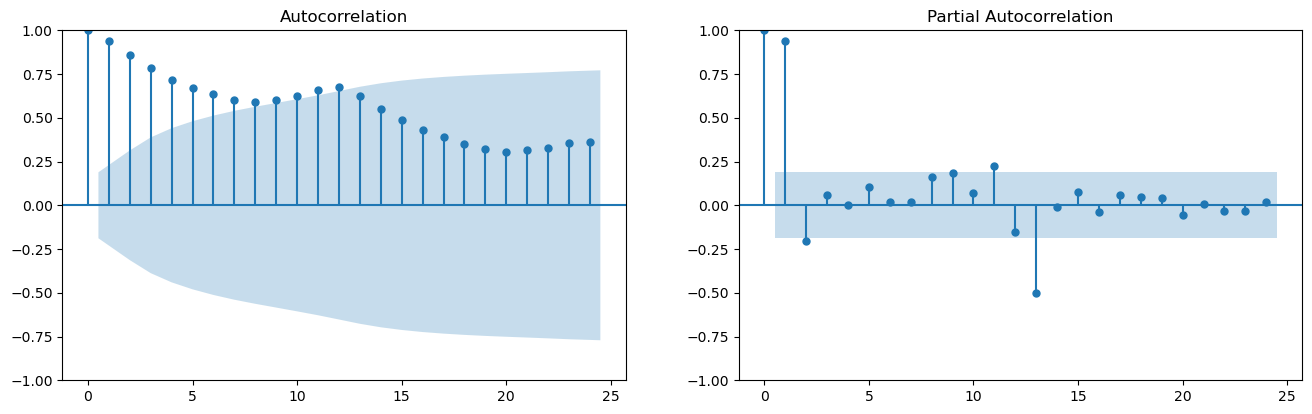

In [10]:
acf_pacf(train, 24)

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def stationary_test(series):
  p_value = adfuller(series)[1]
  print(p_value)
  if p_value < 0.05:
    print("Stationary series")
  else:
    print("Non-stationary series")

In [13]:
stationary_test(train)

0.9942931644042374
Non-stationary series


In [14]:
stationary_test(train.diff().dropna())

0.17765911590175731
Non-stationary series


In [15]:
stationary_test(train.diff().diff().dropna())

2.2447076694536752e-10
Stationary series


## Grid Search

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools

In [17]:
p = range(0, 3) # Autoregression
d = range(2, 3) # Differentiation
q = range(0, 3) # Moving average
s = [0]         # Seasonality

In [18]:
all_params = list(itertools.product(p, d, q, s))

In [19]:
best_score = float("inf")
best_params = None
for params in all_params:
    try:
        model = SARIMAX(train, order=params[:3], seasonal_order=(params[0], params[1], params[2], 12))
        result = model.fit()
        pred = result.get_forecast(steps=len(val))
        mse = mean_squared_error(val, pred.predicted_mean)
        if mse < best_score:
            best_score = mse
            best_params = params
    except:
        continue

/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *



/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seaso

In [20]:
train_complete = result = pd.concat([train, val])
train_complete

,#Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [21]:
model = SARIMAX(train_complete, order=best_params[:3], seasonal_order=(best_params[0], best_params[1], best_params[2], 12))
result = model.fit()
pred = result.forecast(steps=len(test))

/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


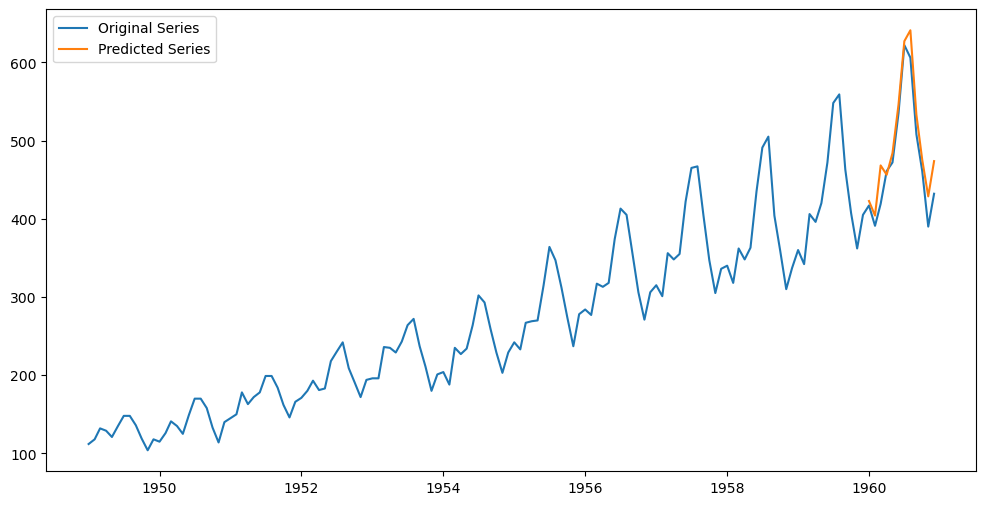

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Series')
plt.plot(pred, label='Predicted Series')
plt.legend()
plt.show()